<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Concrete_Strength_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Concrete Strength Dataset
#Source: https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set
#Objective: Assess the impact of ingredients on concrete strength
#Step 1: Setup and Data Preparation
#1. Load the Dataset

import pandas as pd

# Load the dataset
data = pd.read_csv("concrete_data.csv")

# Display first 5 rows
print(data.head())

# Display last 5 rows
print(data.tail())

   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30  
      cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
1025   276.4               116.0     90.3  179.6               8.9   
1026   

In [2]:
#2. Understand the Structure
# Check structure
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None
            cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    

In [3]:
#3. Handle Missing Values
#If there are missing values:
# Fill missing values with mean
for column in data.columns:
    data[column] = data[column].fillna(data[column].mean())

In [4]:
#4. Scale Numerical Features
#Since all columns are numeric, you can scale them for consistency.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

# Display scaled data
print(scaled_data.head())

     cement  blast_furnace_slag   fly_ash     water  superplasticizer  \
0  2.477915           -0.856888 -0.847144 -0.916764         -0.620448   
1  2.477915           -0.856888 -0.847144 -0.916764         -0.620448   
2  0.491425            0.795526 -0.847144  2.175461         -1.039143   
3  0.491425            0.795526 -0.847144  2.175461         -1.039143   
4 -0.790459            0.678408 -0.847144  0.488793         -1.039143   

   coarse_aggregate  fine_aggregate        age  concrete_compressive_strength  
0          0.863154        -1.217670 -0.279733                       2.645408  
1          1.056164        -1.217670 -0.279733                       1.561421  
2         -0.526517        -2.240917  3.553066                       0.266627  
3         -0.526517        -2.240917  5.057677                       0.313340  
4          0.070527         0.647884  4.978487                       0.507979  


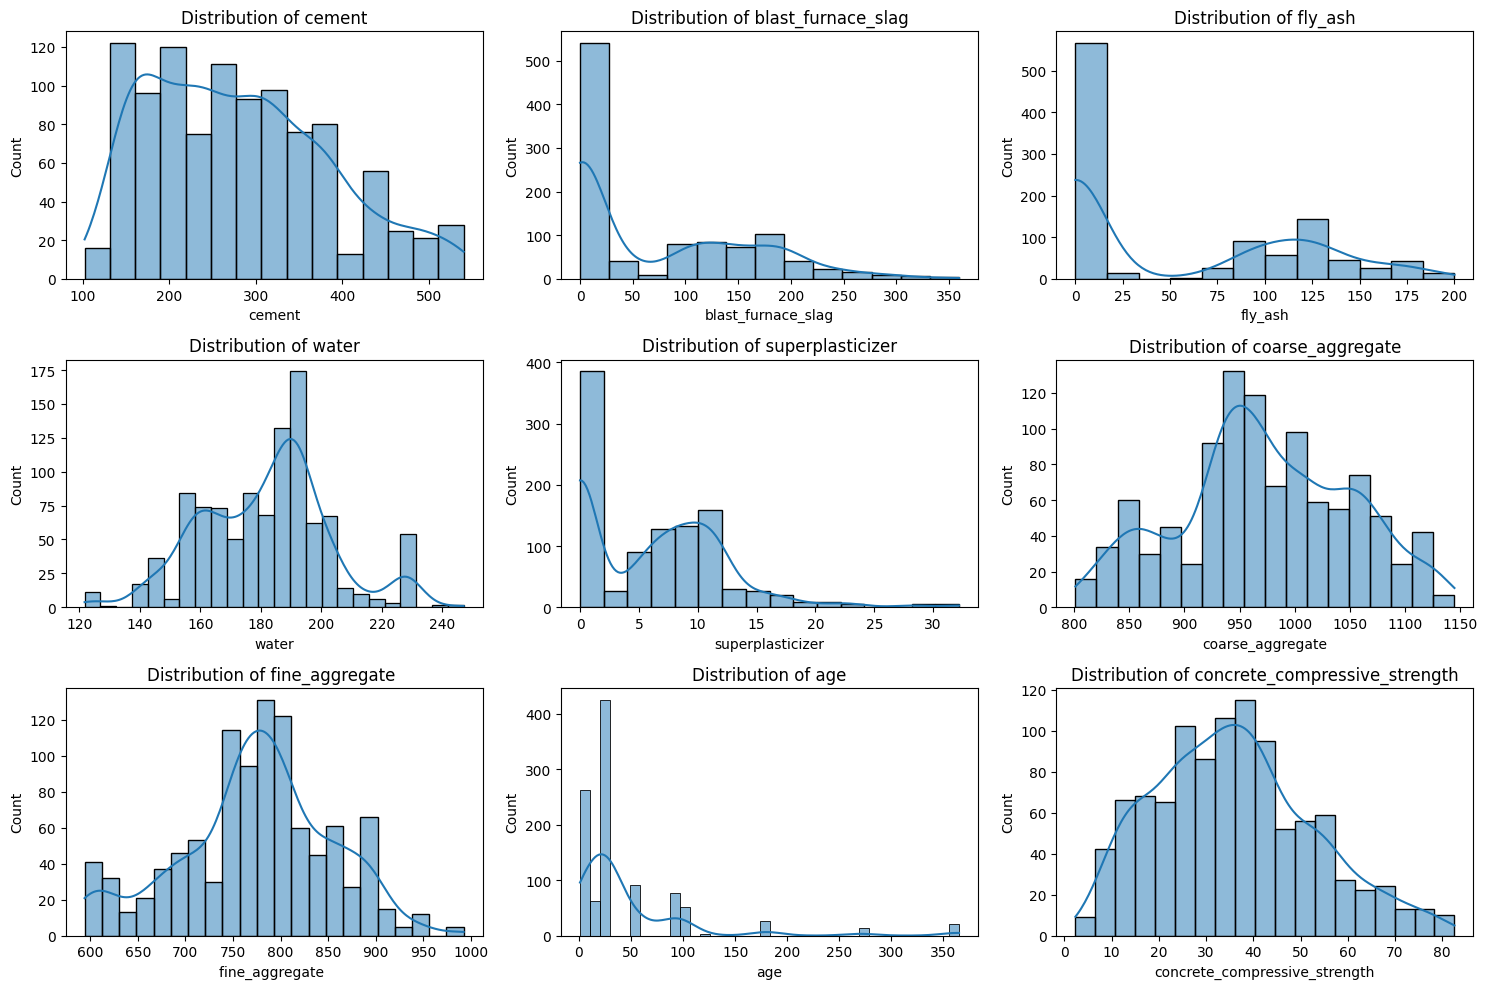

In [5]:
#Step 2: Exploratory Data Analysis
#1. Univariate Analysis
#Analyze the distribution of individual variables.

#Histograms :
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

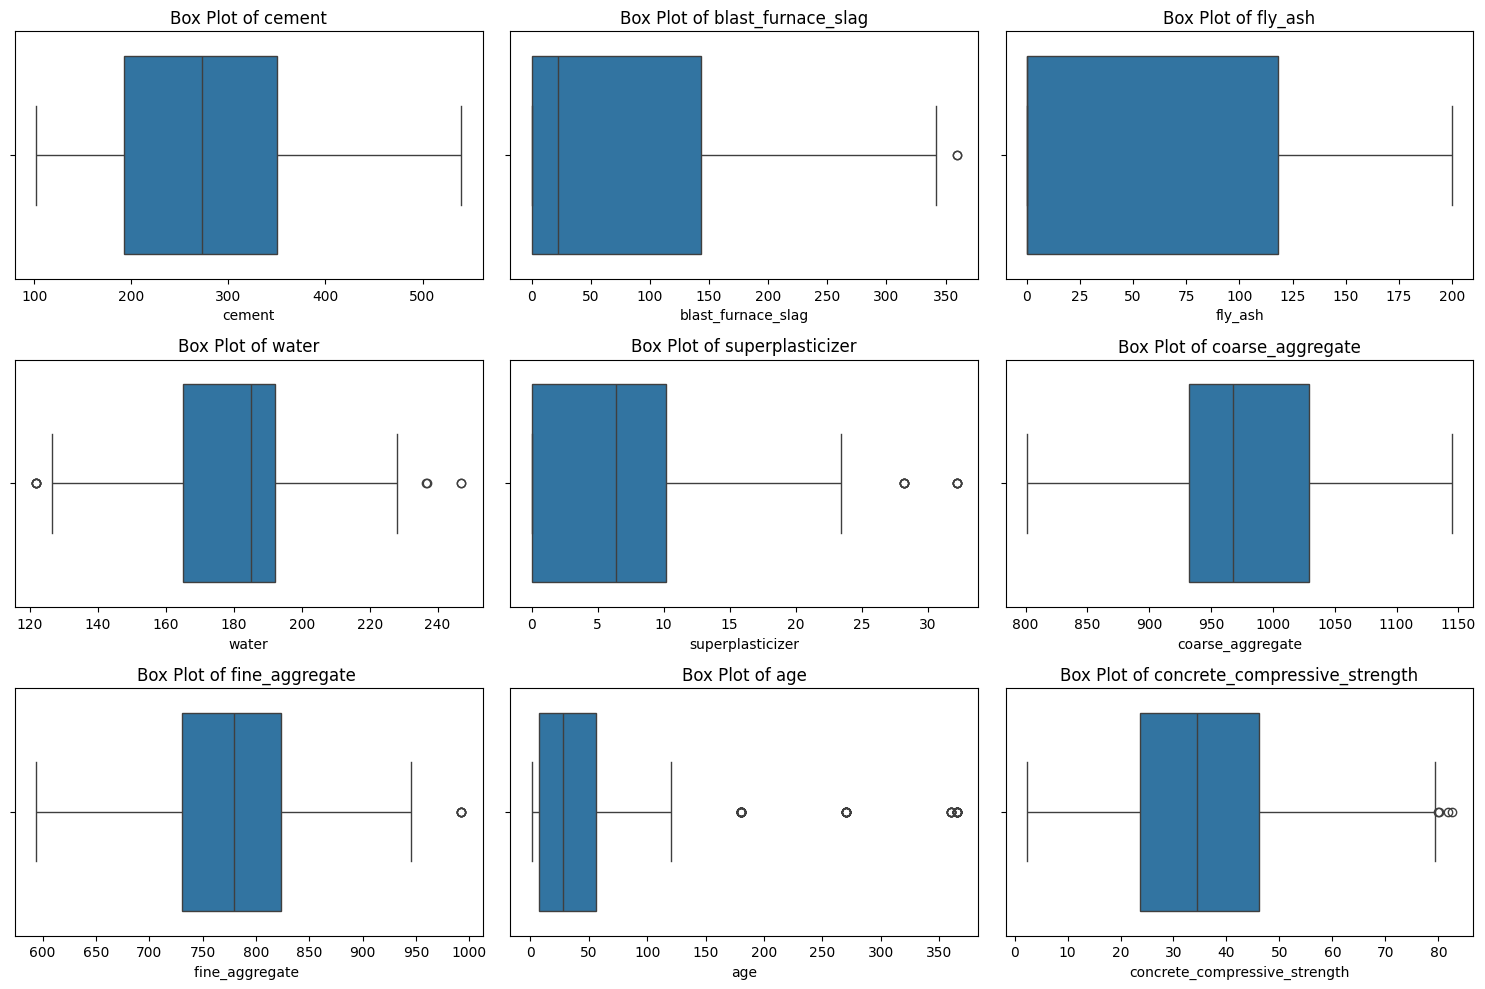

In [6]:
#Box Plots :
# Box plots for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

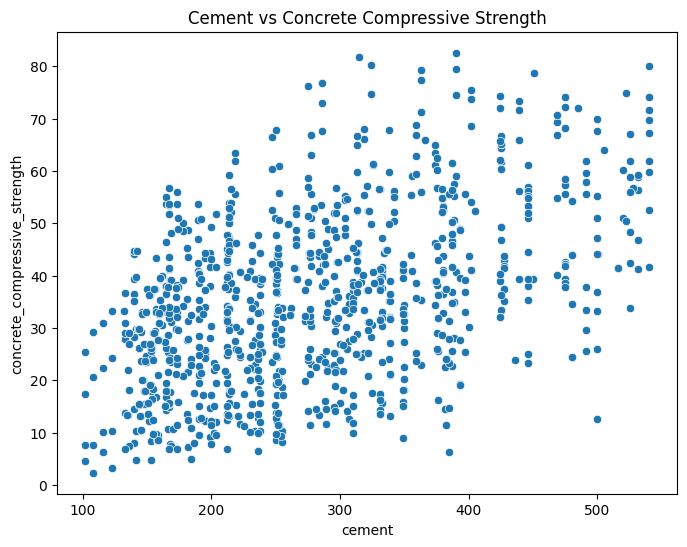

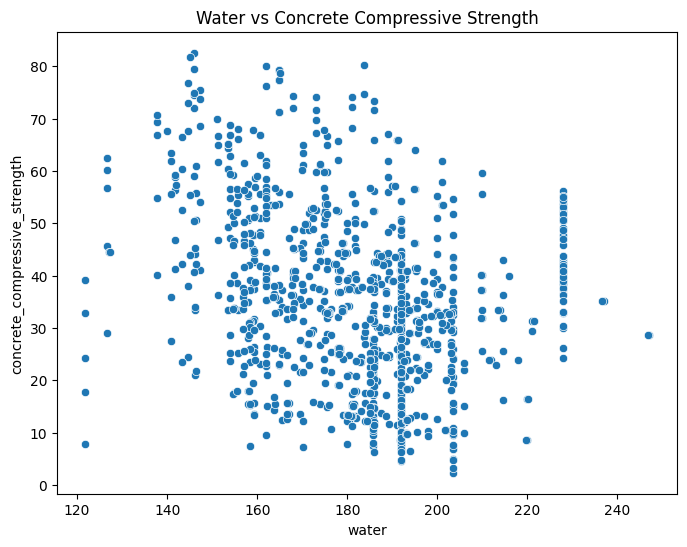

In [16]:
#2. Bivariate Analysis
#Analyze relationships between two variables.

#Scatter Plots :

# Scatter plot: Cement vs Concrete Compressive Strength
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cement', y='concrete_compressive_strength', data=data)
plt.title('Cement vs Concrete Compressive Strength')
plt.show()

# Scatter plot: Water vs Concrete Compressive Strength
plt.figure(figsize=(8, 6))
sns.scatterplot(x='water', y='concrete_compressive_strength', data=data)
plt.title('Water vs Concrete Compressive Strength')
plt.show()

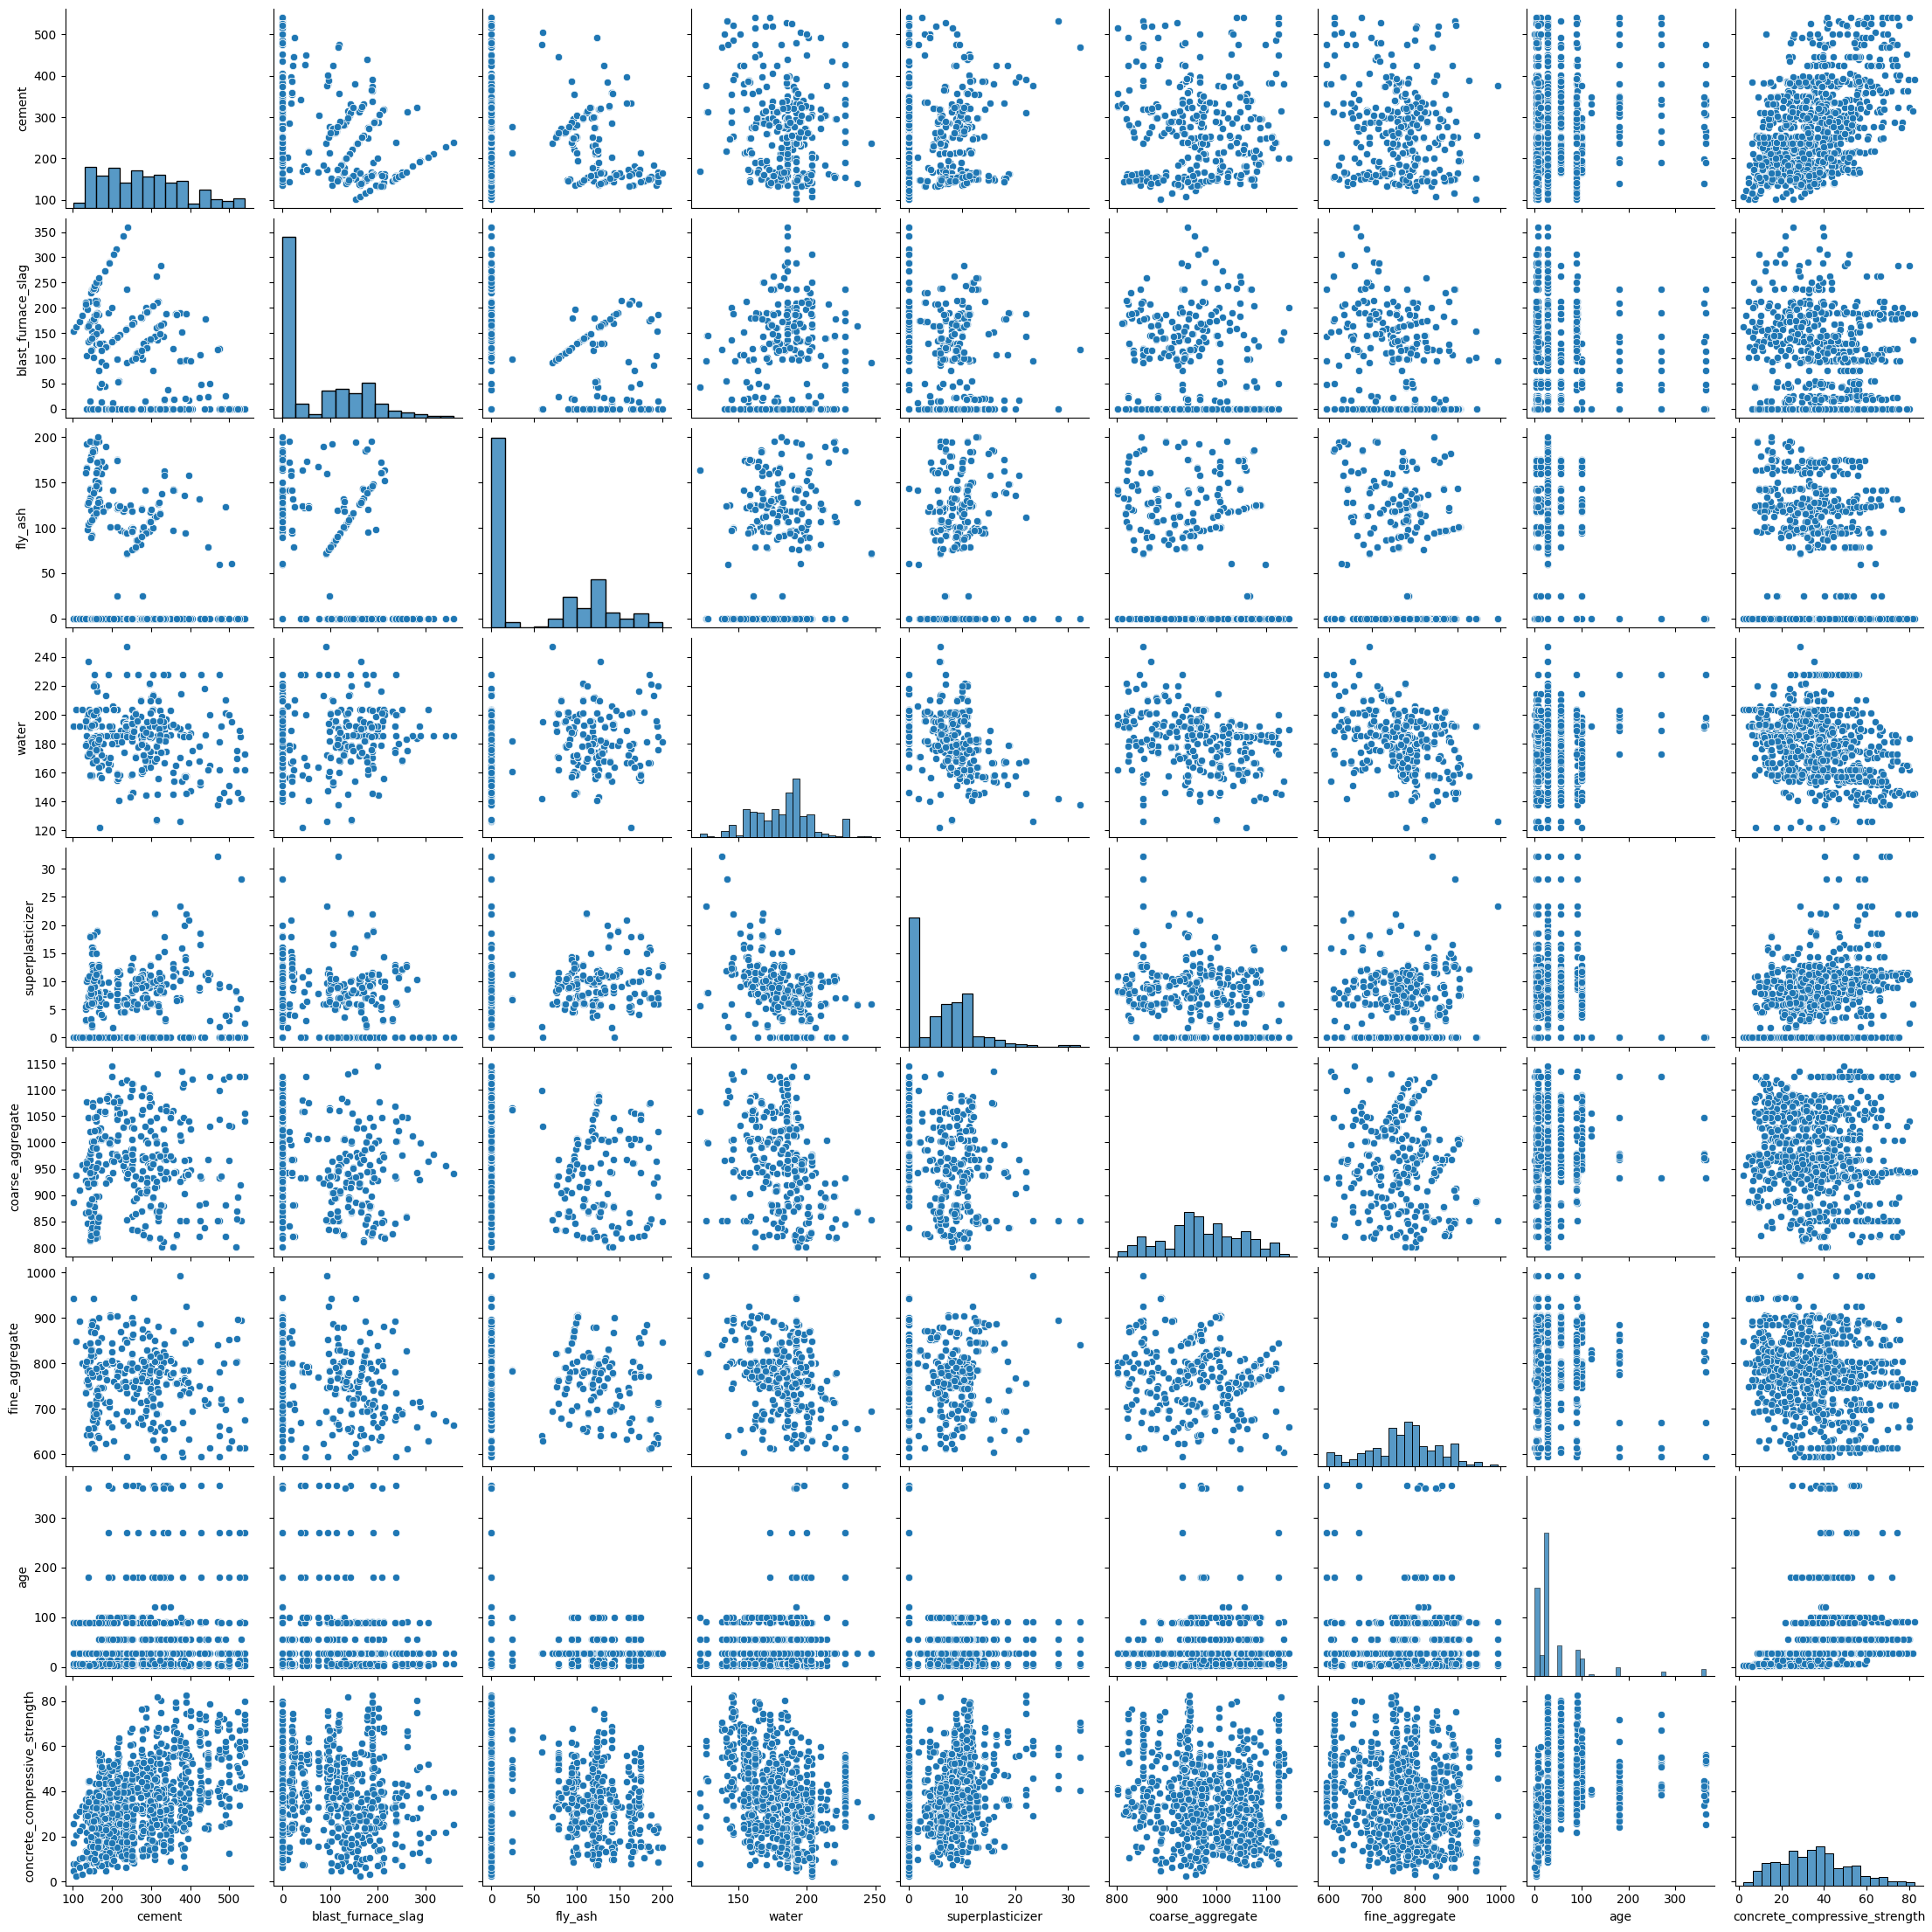

In [17]:
#Pair Plot :
# Pair plot for all variables
sns.pairplot(data)
plt.show()

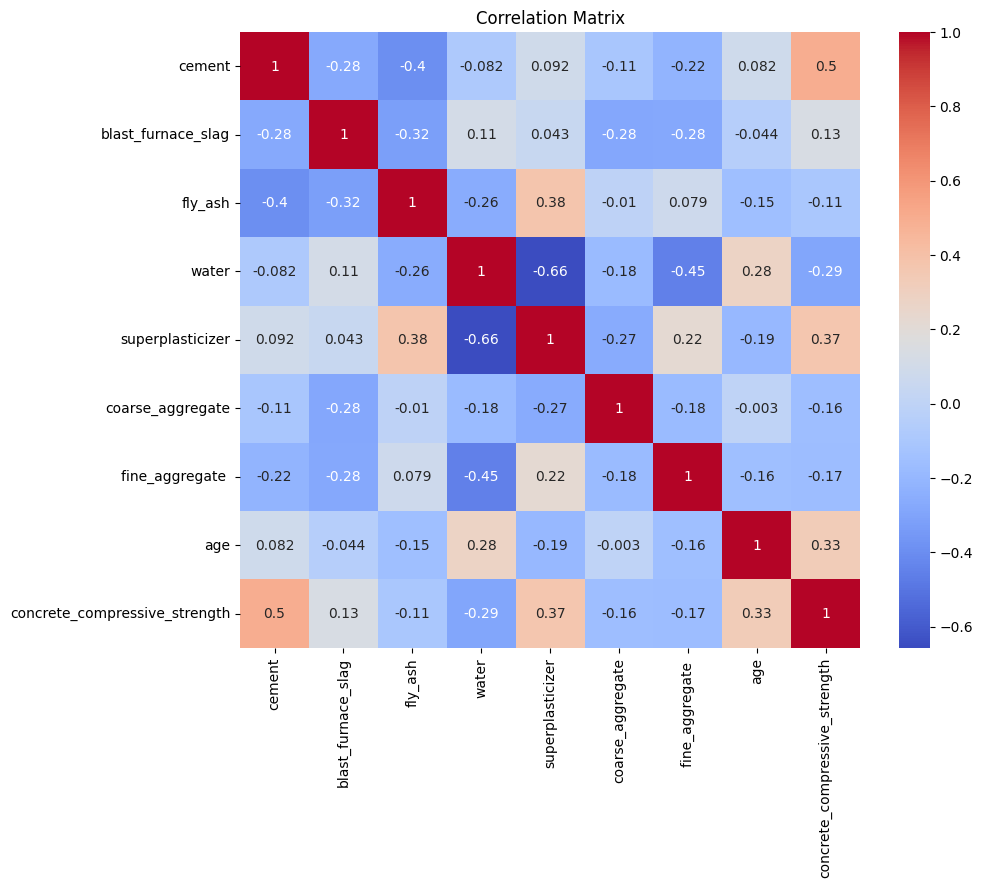

In [18]:
#3. Multivariate Analysis
#Analyze relationships between multiple variables.

#Correlation Matrix :

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
#Step 3: Preprocessing and Feature Engineering
#1. Handle Outliers
#Detect and handle outliers using the Interquartile Range (IQR) method.

# Detect outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare shapes before and after removing outliers
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)

Original shape: (1030, 9)
Cleaned shape: (941, 9)


In [25]:
#2. Encode Categorical Variables
#In this dataset, there are no categorical variables (all columns are numeric), so this step is not required. However, if you encounter categorical variables in other datasets, you can use one-hot encoding or label encoding as shown below:
# Example: One-hot encoding for categorical variables (if any)
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Display encoded dataset
print("\nEncoded Dataset:")
print(data_encoded.head())

# Note: Since there are no categorical variables in this dataset, you can skip this step.




Encoded Dataset:
   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
1   540.0                 0.0      0.0  162.0               2.5   
5   266.0               114.0      0.0  228.0               0.0   
7   380.0                95.0      0.0  228.0               0.0   
8   266.0               114.0      0.0  228.0               0.0   
9   475.0                 0.0      0.0  228.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
1            1055.0            676.0   28                          61.89  
5             932.0            670.0   90                          47.03  
7             932.0            594.0   28                          36.45  
8             932.0            670.0   28                          45.85  
9             932.0            594.0   28                          39.29  


In [26]:
#3. Scale Numerical Features
#You’ve already scaled the data earlier using StandardScaler. However, after removing outliers (data_cleaned), you should re-scale the cleaned dataset:

from sklearn.preprocessing import StandardScaler

# Re-scale numerical features for the cleaned dataset
scaler = StandardScaler()
scaled_data_cleaned = scaler.fit_transform(data_cleaned)
scaled_data_cleaned = pd.DataFrame(scaled_data_cleaned, columns=data_cleaned.columns)

# Display scaled cleaned dataset
print("\nScaled Cleaned Dataset:")
print(scaled_data_cleaned.head())


Scaled Cleaned Dataset:
     cement  blast_furnace_slag   fly_ash     water  superplasticizer  \
0  2.594760           -0.855740 -0.901915 -0.993547         -0.702013   
1 -0.095894            0.465049 -0.901915  2.528520         -1.170347   
2  1.023575            0.244917 -0.901915  2.528520         -1.170347   
3 -0.095894            0.465049 -0.901915  2.528520         -1.170347   
4  1.956466           -0.855740 -0.901915  2.528520         -1.170347   

   coarse_aggregate  fine_aggregate        age  concrete_compressive_strength  
0          1.033328        -1.340064 -0.153317                       1.628245  
1         -0.551615        -1.420026  2.018806                       0.732186  
2         -0.551615        -2.432885 -0.153317                       0.094210  
3         -0.551615        -1.420026 -0.153317                       0.661031  
4         -0.551615        -2.432885 -0.153317                       0.265463  



Correlation with 'concrete_compressive_strength' (Cleaned Data):
concrete_compressive_strength    1.000000
age                              0.517506
cement                           0.476763
superplasticizer                 0.402702
blast_furnace_slag               0.141416
fly_ash                         -0.054794
fine_aggregate                  -0.156866
coarse_aggregate                -0.168207
water                           -0.369219
Name: concrete_compressive_strength, dtype: float64


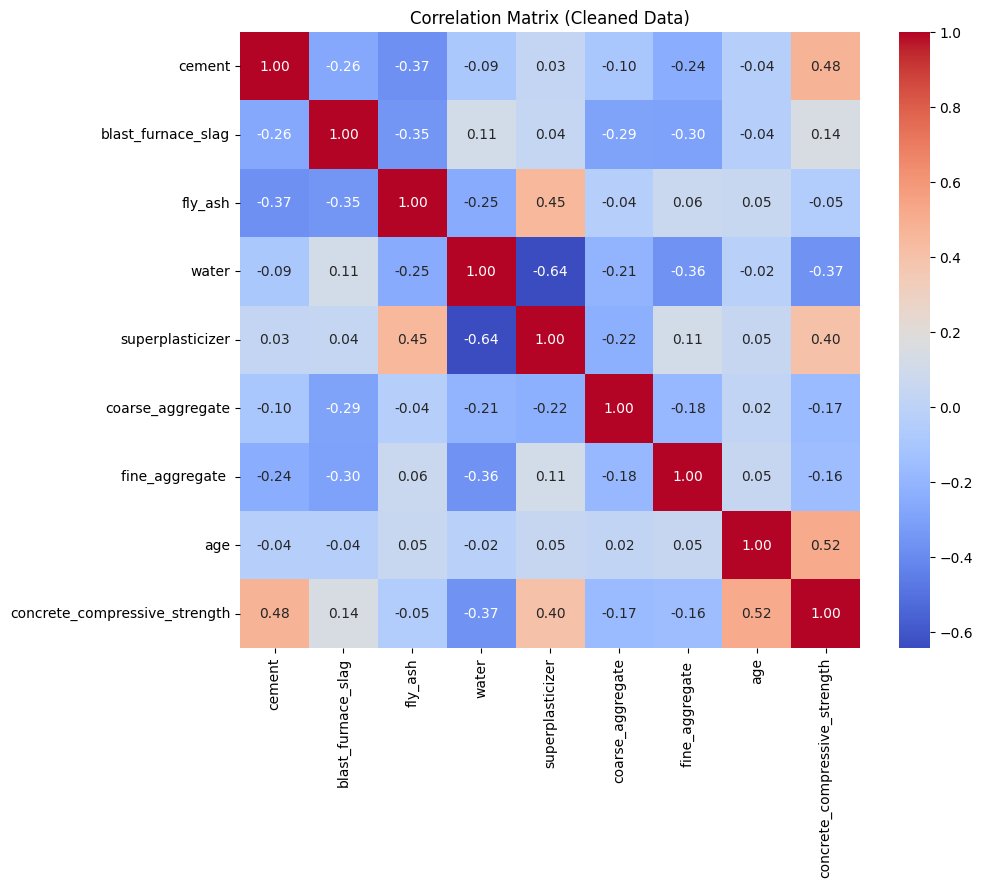

In [27]:
#Step 5: Feature Selection
#Identify the most important features that influence concrete_compressive_strength.

#1. Correlation Analysis
#Re-calculate the correlation matrix for the cleaned dataset to identify highly correlated features:
# Correlation matrix for cleaned data
correlation_matrix_cleaned = data_cleaned.corr()

# Display correlation with the target variable
print("\nCorrelation with 'concrete_compressive_strength' (Cleaned Data):")
print(correlation_matrix_cleaned['concrete_compressive_strength'].sort_values(ascending=False))

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Cleaned Data)')
plt.show()


Feature Importance from Random Forest:
age                   0.335494
cement                0.326104
water                 0.114600
blast_furnace_slag    0.087258
superplasticizer      0.064713
fine_aggregate        0.028681
coarse_aggregate      0.027691
fly_ash               0.015459
dtype: float64


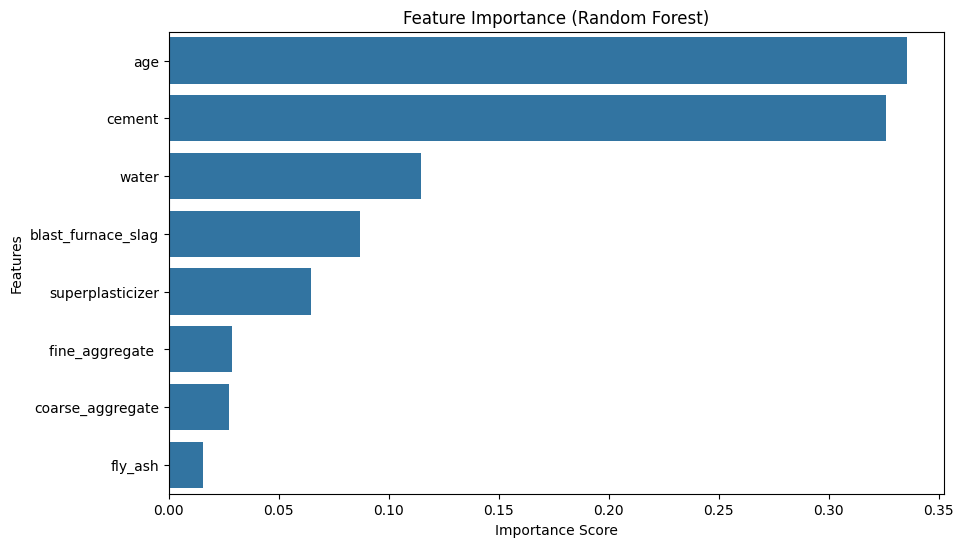

In [28]:
#2. Model-Based Feature Importance
#Use a Random Forest model to rank feature importance:

from sklearn.ensemble import RandomForestRegressor

# Split data into features (X) and target (y)
X = data_cleaned.drop('concrete_compressive_strength', axis=1)
y = data_cleaned['concrete_compressive_strength']

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Extract feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display feature importance
print("\nFeature Importance from Random Forest:")
print(feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [29]:
#3. Final Selected Features
#Based on the correlation and feature importance, select the most relevant features:
# Select features with importance > 0.05 (adjust threshold as needed)
selected_features = feature_importances[feature_importances > 0.05].index
print("\nFinal Selected Features:")
print(selected_features)

# Create a new dataset with only selected features
data_selected = data_cleaned[selected_features.union(['concrete_compressive_strength'])]
print("\nDataset with Selected Features:")
print(data_selected.head())


Final Selected Features:
Index(['age', 'cement', 'water', 'blast_furnace_slag', 'superplasticizer'], dtype='object')

Dataset with Selected Features:
   age  blast_furnace_slag  cement  concrete_compressive_strength  \
1   28                 0.0   540.0                          61.89   
5   90               114.0   266.0                          47.03   
7   28                95.0   380.0                          36.45   
8   28               114.0   266.0                          45.85   
9   28                 0.0   475.0                          39.29   

   superplasticizer  water  
1               2.5  162.0  
5               0.0  228.0  
7               0.0  228.0  
8               0.0  228.0  
9               0.0  228.0  


In [30]:
#Step 6: Summary of Insights
#Key Findings
#Summarize insights from the EDA and preprocessing steps:

# Key findings
print("\nKey Findings:")
print("1. Strong correlations were observed between 'cement', 'superplasticizer', and 'concrete_compressive_strength'.")
print("2. 'Water' showed a moderate negative correlation with 'concrete_compressive_strength'.")
print("3. Outliers were detected and removed using the IQR method.")
print("4. No significant categorical variables were present in the dataset.")
print("5. Scaling was applied to ensure consistent feature ranges.")


Key Findings:
1. Strong correlations were observed between 'cement', 'superplasticizer', and 'concrete_compressive_strength'.
2. 'Water' showed a moderate negative correlation with 'concrete_compressive_strength'.
3. Outliers were detected and removed using the IQR method.
4. No significant categorical variables were present in the dataset.
5. Scaling was applied to ensure consistent feature ranges.
